
# NAME --PAPU SWAIN

DOMAIN-TELECOMMUNICATION

PROJECT-Comcast Telecom Consumer Complaints

OBJECTIVE OF THE PROJECT- Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.Therefore,i have to analyse what is wrong with Comcast's customer service and solve the problem accordingly.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import data into python

In [2]:
dt=pd.read_csv("Comcast_telecom_complaints_data.csv")

In [3]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


Checking null values

In [4]:
dt.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [5]:
dt.describe(include="all")

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [7]:
dt["Date_Time"]=dt["Date_month_year"]+" "+dt["Time"]

In [8]:
dt["Date_Time"]=pd.to_datetime(dt["Date_Time"])
dt["Date_month_year"]=pd.to_datetime(dt["Date_month_year"])

In [9]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   object        
 3   Date_month_year              2224 non-null   datetime64[ns]
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
 11  Date_Time                    2224 non-null 

In [10]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


Set Date_Time as index column

In [11]:
dt=dt.set_index(dt["Date_Time"])

In [12]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time
Date_Time,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


From Date_month_year column, Create Month,Day,Year and Day of week columns

In [13]:
dt["Month"]=dt["Date_month_year"].apply(lambda x:x.month)

In [14]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time,Month
Date_Time,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5


In [15]:
dt["Day"]=dt["Date_month_year"].apply(lambda x:x.day)

In [16]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time,Month,Day
Date_Time,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,22
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,4
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,18
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,5
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,26


In [17]:
dt["Year"]=dt["Date_month_year"].apply(lambda x:x.year)

In [18]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time,Month,Day,Year
Date_Time,,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,22,2015
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,4,2015
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,18,2015
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,5,2015
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,26,2015


In [19]:
dt["Day of Week"] = dt["Date_month_year"].apply(lambda x:x.dayofweek)

In [20]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time,Month,Day,Year,Day of Week
Date_Time,,,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,22,2015,2
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,4,2015,1
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,18,2015,5
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,5,2015,6
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,26,2015,1


In [21]:
dt["Day of Week"].value_counts()

1    464
2    441
3    331
4    290
0    256
6    228
5    214
Name: Day of Week, dtype: int64

Give names of Day of Week instead of numbers 

In [22]:
dict={0:"Mon",1:"Tue",2:"Wed",3:"Thur",4:"Fri",5:"Sat",6:"Sun"}

In [23]:
dt["Day of Week"]=dt["Day of Week"].map(dict)

In [24]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time,Month,Day,Year,Day of Week
Date_Time,,,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,22,2015,Wed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,4,2015,Tue
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,18,2015,Sat
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,5,2015,Sun
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,26,2015,Tue


Give names of Months  instead of numbers

In [25]:
dict1={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

In [26]:
dt["Month Name"]=dt["Month"]

In [27]:
dt["Month Name"]=dt["Month Name"].map(dict1)

In [28]:
dt.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Date_Time,Month,Day,Year,Day of Week,Month Name
Date_Time,,,,,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,4,22,2015,Wed,Apr
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,8,4,2015,Tue,Aug
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,4,18,2015,Sat,Apr
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,7,5,2015,Sun,Jul
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,5,26,2015,Tue,May


Trend chart for the number of complaints at monthly levels

Text(0.5, 1.0, 'Monthly trends of complaints')

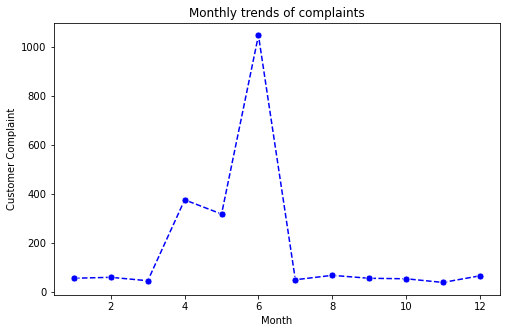

In [29]:
plt.figure(figsize=(8,5))
dt1=dt.groupby("Month").count()
sns.lineplot(x="Month", y= "Customer Complaint",data=dt1,sort=False,marker="o",color="b",legend=False,linestyle="--",ms=7)
plt.title("Monthly trends of complaints")

Text(0.5, 1.0, 'Monthly trend of complaints')

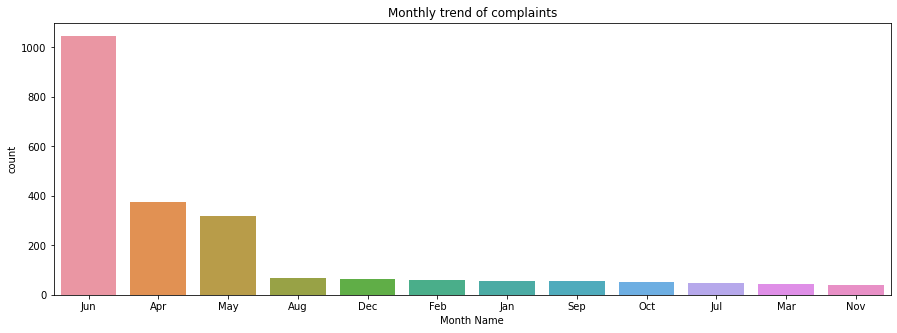

In [30]:
plt.figure(figsize=(15,5))
sns.countplot(x="Month Name",data=dt,order=dt["Month Name"].value_counts().index)
plt.title("Monthly trend of complaints")

Trend chart for the number of complaints at daily levels

Text(0.5, 1.0, 'Day trends of complaints')

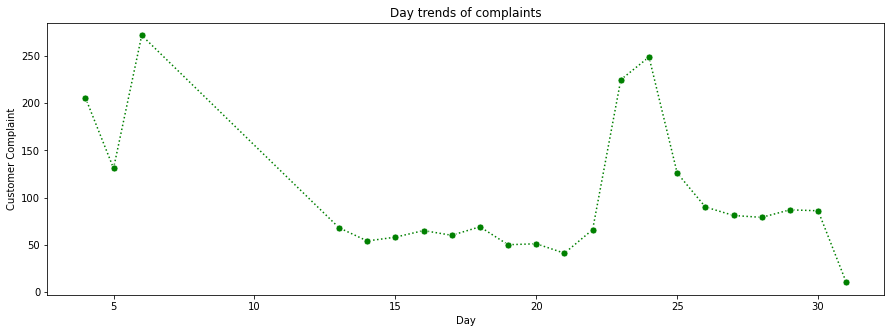

In [31]:
plt.figure(figsize=(15,5))
dt2=dt.groupby("Day").count()
sns.lineplot(x="Day", y= "Customer Complaint",data=dt2,sort=False,marker="o",color="g",legend=False,linestyle=":",ms=7)
plt.title("Day trends of complaints")

Text(0.5, 1.0, 'Day trends of complaints')

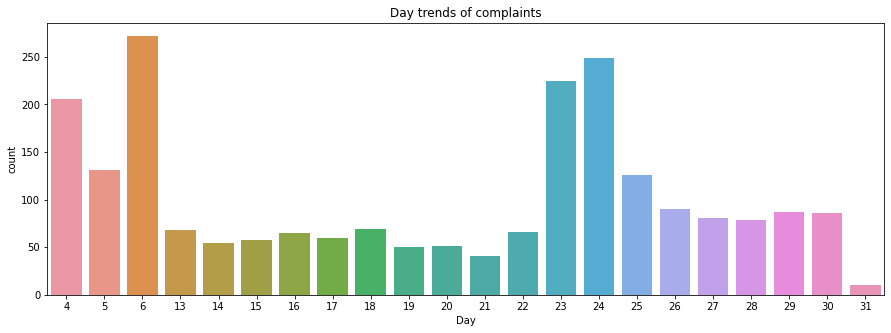

In [32]:
plt.figure(figsize=(15,5))
sns.countplot(x="Day",data=dt)
plt.title("Day trends of complaints")

Trend chart for the number of complaints at weekly levels

Text(0.5, 1.0, 'Weekly trends of complaints')

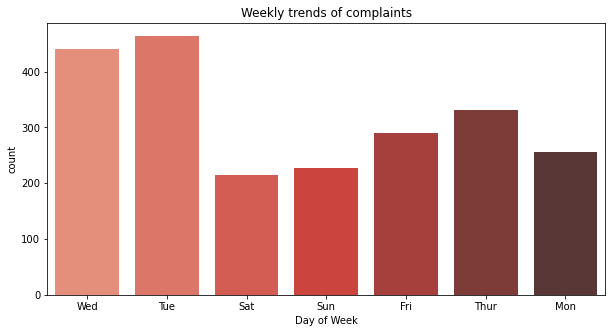

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day of Week",data=dt,palette ="Reds_d")
plt.title("Weekly trends of complaints")

Text(0.5, 1.0, 'Weekly trends of complaints')

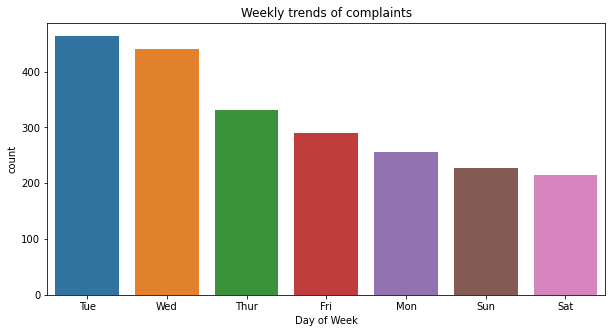

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day of Week",data=dt,order=dt["Day of Week"].value_counts().index)
plt.title("Weekly trends of complaints")

 Provide a table with the frequency of complaint types and to know Which complaint types are maximum i.e., around internet, network issues, or across any other domains. 

In [35]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [36]:
from wordcloud import WordCloud, STOPWORDS

In [37]:
text=dt["Customer Complaint"].values
text

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [38]:
wordcloud = WordCloud(width=400,height=200,background_color="black",stopwords=STOPWORDS).generate(str(text))

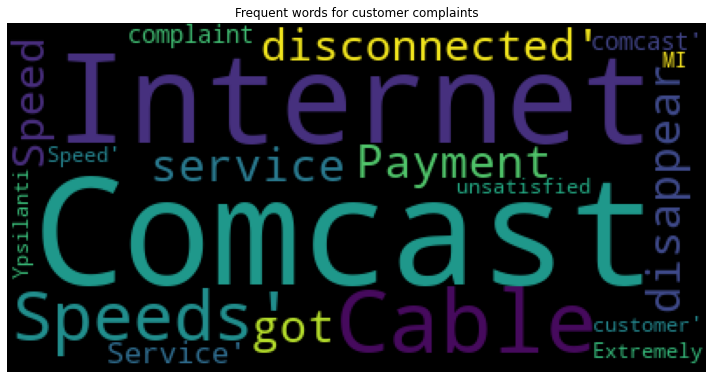

In [39]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation="kaiser")
plt.title("Frequent words for customer complaints")
plt.axis("off")
plt.tight_layout()

In [40]:
import nltk

In [41]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [44]:
stop = set(stopwords.words("english"))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [45]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join([ch for ch in stop_free if ch not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [46]:
doc_complete = dt['Customer Complaint'].tolist()
doc_clean = [clean(doc).split() for doc in doc_complete]
doc_complete

['Comcast Cable Internet Speeds',
 'Payment disappear - service got disconnected',
 'Speed and Service',
 'Comcast Imposed a New Usage Cap of 300GB that punishes streaming.',
 'Comcast not working and no service to boot',
 'ISP Charging for arbitrary data limits with overage fees',
 'Throttling service and unreasonable data caps',
 'Comcast refuses to help troubleshoot and correct my service.',
 'Comcast extended outages',
 'Comcast Raising Prices and Not Being Available To Ask Why',
 'Billing after service was asked to be disconnected',
 'YAHOO FAILURE TO RESTORE EMAIL SEARCH FEATURE',
 'Comcast Violating Open Internet Rules by Blocking HBO Go Access on Sony Consoles',
 'Internet speed',
 'Internet Disconnects Every Night',
 'Internet complaint',
 'Internet Availability and Speed',
 'Comcast owes me $65 and claims I need to return equipment I never had',
 'Horrible Internet Service',
 'Failure to provide services that I am billed for.',
 'Internet out all the time but they have a mono

In [47]:
doc_clean

[['comcast', 'cable', 'internet', 'speed'],
 ['payment', 'disappear', 'service', 'got', 'disconnected'],
 ['speed', 'service'],
 ['comcast',
  'imposed',
  'new',
  'usage',
  'cap',
  '300gb',
  'punishes',
  'streaming'],
 ['comcast', 'working', 'service', 'boot'],
 ['isp', 'charging', 'arbitrary', 'data', 'limit', 'overage', 'fee'],
 ['throttling', 'service', 'unreasonable', 'data', 'cap'],
 ['comcast', 'refuse', 'help', 'troubleshoot', 'correct', 'service'],
 ['comcast', 'extended', 'outage'],
 ['comcast', 'raising', 'price', 'available', 'ask'],
 ['billing', 'service', 'asked', 'disconnected'],
 ['yahoo', 'failure', 'restore', 'email', 'search', 'feature'],
 ['comcast',
  'violating',
  'open',
  'internet',
  'rule',
  'blocking',
  'hbo',
  'go',
  'access',
  'sony',
  'console'],
 ['internet', 'speed'],
 ['internet', 'disconnect', 'every', 'night'],
 ['internet', 'complaint'],
 ['internet', 'availability', 'speed'],
 ['comcast', 'owes', '65', 'claim', 'need', 'return', 'equipm

In [48]:
%pip install -U gensim

Requirement already up-to-date: gensim in c:\users\hp\anaconda3\lib\site-packages (4.1.2)
Note: you may need to restart the kernel to use updated packages.


In [49]:
import gensim

In [50]:
from gensim import corpora

In [51]:
dictionary = corpora.Dictionary(doc_clean)
dictionary

In [52]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(3, 1), (8, 1)],
 [(1, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1)],
 [(1, 1), (8, 1), (16, 1), (17, 1)],
 [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(8, 1), (10, 1), (20, 1), (25, 1), (26, 1)],
 [(1, 1), (8, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(1, 1), (31, 1), (32, 1)],
 [(1, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(5, 1), (8, 1), (37, 1), (38, 1)],
 [(39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(1, 1),
  (2, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(2, 1), (3, 1)],
 [(2, 1), (54, 1), (55, 1), (56, 1)],
 [(2, 1), (57, 1)],
 [(2, 1), (3, 1), (58, 1)],
 [(1, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1)],
 [(2, 1), (8, 1), (66, 1)],
 [(8, 1), (40, 1), (67, 1), (68, 1), (69, 1)],
 [(2, 1), (70, 1), (71, 1)],
 [(0, 1), (8, 2), (66, 1), (72, 1)],
 [(3, 1)],
 [(1

In [53]:
from gensim.models import LdaModel

In [54]:
num_topic = 9
ldamodel = LdaModel(doc_term_matrix,num_topics=num_topic,id2word = dictionary,passes=10)

In [55]:
topics = ldamodel.show_topics()
for topic in topics:
    print(topic)
    print()

(0, '0.070*"pricing" + 0.064*"cable" + 0.045*"false" + 0.037*"switch" + 0.029*"installation" + 0.028*"day" + 0.025*"bait" + 0.023*"12" + 0.020*"unfair" + 0.018*"billed"')

(1, '0.184*"billing" + 0.125*"comcast" + 0.089*"issue" + 0.077*"service" + 0.059*"practice" + 0.042*"unfair" + 0.031*"customer" + 0.017*"connectivity" + 0.013*"intermittent" + 0.013*"get"')

(2, '0.099*"comcast" + 0.059*"service" + 0.045*"xfinity" + 0.039*"bill" + 0.027*"deceptive" + 0.025*"contract" + 0.023*"monthly" + 0.022*"connection" + 0.021*"sale" + 0.015*"modem"')

(3, '0.160*"service" + 0.084*"comcast" + 0.040*"poor" + 0.036*"customer" + 0.033*"billing" + 0.025*"monopolistic" + 0.020*"monopoly" + 0.020*"fraudulent" + 0.019*"price" + 0.018*"terrible"')

(4, '0.220*"data" + 0.178*"cap" + 0.132*"comcast" + 0.041*"usage" + 0.018*"lack" + 0.017*"limit" + 0.014*"pay" + 0.014*"xfinity" + 0.012*"option" + 0.011*"tucson"')

(5, '0.272*"comcast" + 0.124*"complaint" + 0.019*"payment" + 0.018*"broadband" + 0.015*"several

In [56]:
word_dict = {}
for i in range(num_topic):
    words = ldamodel.show_topic(i,topn = 20)
    word_dict['Topic '+"{}".format(i)]=[i[0] for i in words]

In [57]:
pd.DataFrame(word_dict)

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8
0,pricing,billing,comcast,service,data,comcast,internet,comcast,incorrect
1,cable,comcast,service,comcast,cap,complaint,comcast,charge,help
2,false,issue,xfinity,poor,comcast,payment,speed,service,time
3,switch,service,bill,customer,usage,broadband,service,fee,plan
4,installation,practice,deceptive,billing,lack,several,slow,without,loss
5,day,unfair,contract,monopolistic,limit,mb,throttling,equipment,overcharge
6,bait,customer,monthly,monopoly,pay,low,bill,promised,10
7,12,connectivity,connection,fraudulent,xfinity,hbo,price,charged,disconnection
8,unfair,intermittent,sale,price,option,bandwidth,problem,show,mbps
9,billed,get,modem,terrible,tucson,ps4,comcastxfinity,account,refund


In [58]:
%pip install pyldavis

Note: you may need to restart the kernel to use updated packages.


In [59]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()

C:\Users\hp\anaconda3\lib\site-packages\sklearn\decomposition\_lda.py:28: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  EPS = np.finfo(np.float).eps


In [60]:
Lda_display = pyLDAvis.gensim_models.prepare(ldamodel,doc_term_matrix,dictionary,sort_topics=False)
pyLDAvis.display(Lda_display)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\hp\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


Create a new categorical variable with value as Open and Closed.

In [61]:
dt["Status"].unique()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [62]:
dt["New status"]=["open" if status=="Open" or status=="Pending" else "closed" for status in dt["Status"]]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
dt["New status"].unique()

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['closed', 'open'], dtype=object)

state wise status of complaints in a stacked bar chart

In [64]:
data1=dt.groupby(["State","New status"]).size().unstack().fillna(0)
data1

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


New status,closed,open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:ylabel='State'>

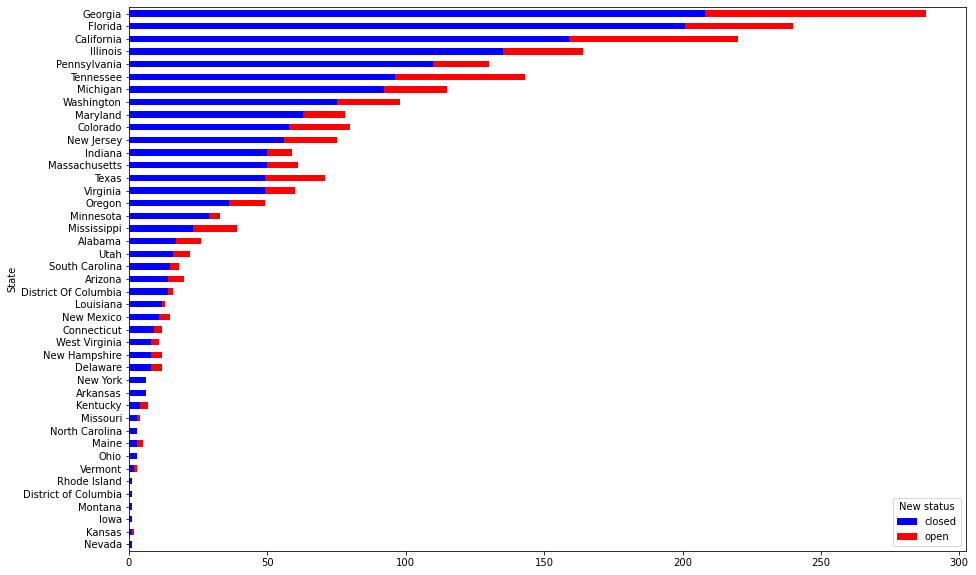

In [65]:
data1.sort_values("closed",axis=0,ascending=True).plot(kind="barh",stacked=True,figsize=(15,10),color=["blue","red"])

### From the stacked bar chart,i got that Georgia has maximum complaints

In [66]:
dt.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0:"Customer counting"},axis=1)[:1]

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Customer counting
State,
Georgia,288


In [67]:
data2=dt.groupby(["State","New status"]).size().unstack().fillna(0).sort_values("closed",ascending=False,axis=0)[:1]
data2

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


New status,closed,open
State,,
Georgia,208.0,80.0


### Georgia has maximum complaints i.e. 288

In [68]:
data2["Total"]=data2["open"]+data2["closed"]
data2["unresolved complaint"]=data2["open"]/data2["Total"]*100
data2["resolved complaint"]=data2["closed"]/data2["Total"]*100
data2

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


New status,closed,open,Total,unresolved complaint,resolved complaint
State,,,,,
Georgia,208.0,80.0,288.0,27.777778,72.222222


### Georgia has the highest percentage of unresolved complaints (27.777778%)

In [69]:
data3=dt.groupby(["Received Via","New status"]).size().unstack().fillna(0)
data3

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


New status,closed,open
Received Via,,
Customer Care Call,864,255
Internet,843,262


In [70]:
data3["Total"]=data3["open"]+data3["closed"]
data3["resolved_Customer Care Call"]=data3["open"]/data3["Total"]*100
data3["resolved_Internet"]=data3["closed"]/data3["Total"]*100
data3

C:\Users\hp\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


New status,closed,open,Total,resolved_Customer Care Call,resolved_Internet
Received Via,,,,,
Customer Care Call,864,255,1119,22.788204,77.211796
Internet,843,262,1105,23.710407,76.289593


### 23.710407% and 22.788204% of complaints resolved till date, which were received through the Internet and customer care calls respectively.

#                                               THANK YOU